# Chapter 8 - Signal Processing and Time Series

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#import warnings
#warnings.filterwarnings("ignore")

## Moving Averages


In [4]:
# Real link: https://github.com/PacktPublishing/Python-Data-Analysis-Third-Edition/blob/master/Chapter08/sales.csv

# Use the raw link to access the actual CSV file
url = "https://raw.githubusercontent.com/PacktPublishing/Python-Data-Analysis-Third-Edition/refs/heads/master/Chapter08/sales.csv"

# Reading the CSV file
sales_data = pd.read_csv(url)

# Display the first 5 rows of the DataFrame
sales_data.head()

,Time,Sales
0,01/01/17,271.5
1,01/02/17,151.4
2,01/03/17,188.6
3,01/04/17,124.8
4,01/05/17,185.8


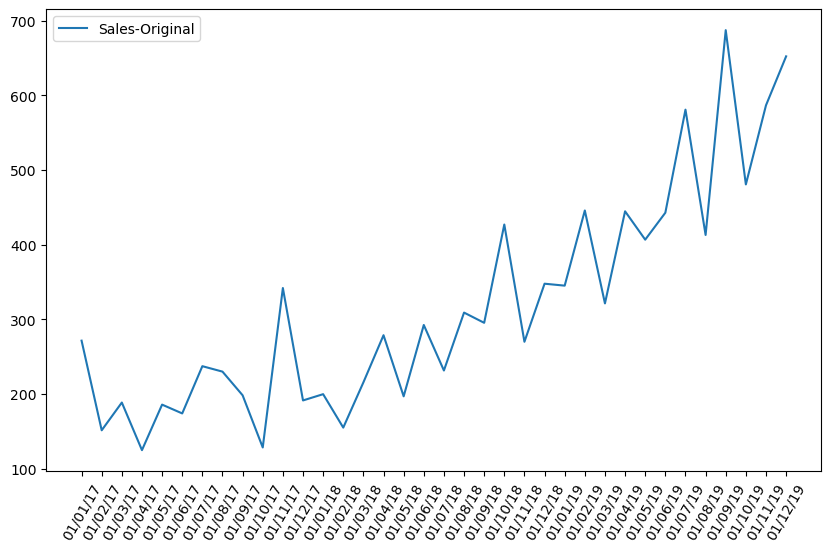

In [5]:
# Setting figure size
plt.figure(figsize=(10,6))

# Plot original sales data
plt.plot(sales_data['Time'], sales_data['Sales'], label="Sales-Original")

# Rotate xlabels
plt.xticks(rotation=60)

# Add legends
plt.legend()

#display the plot
plt.show()

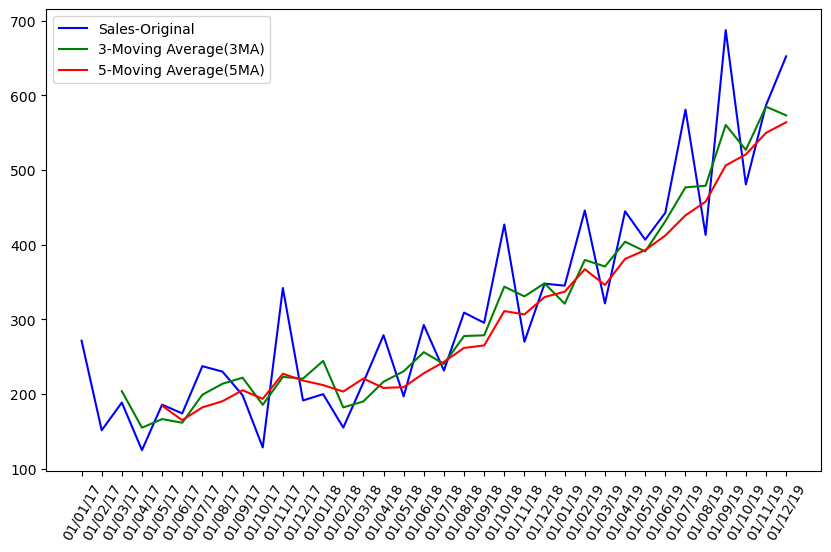

In [6]:
# Moving average with window 3
sales_data['3MA']=sales_data['Sales'].rolling(window=3).mean()

# Moving average with window 5
sales_data['5MA']=sales_data['Sales'].rolling(window=5).mean()

# Setting figure size
plt.figure(figsize=(10,6))

# Plot original sales data
plt.plot(sales_data['Time'], sales_data['Sales'], label="Sales-Original",color="blue")

# Plot 3-Moving Average of sales data
plt.plot(sales_data['Time'], sales_data['3MA'], label="3-Moving Average(3MA)", color="green")

# Plot 5-Moving Average of sales data
plt.plot(sales_data['Time'], sales_data['5MA'], label="5-Moving Average(5MA)", color="red")

# Rotate xlabels
plt.xticks(rotation=60)

# Add legends
plt.legend()

# Display the plot
plt.show()

In [7]:
sales_data.tail()

,Time,Sales,3MA,5MA
31,01/08/19,413.1,479.000000,457.72
32,01/09/19,687.5,560.533333,506.26
33,01/10/19,480.8,527.133333,521.06
34,01/11/19,586.8,585.033333,549.84
35,01/12/19,652.4,573.333333,564.12


## Window Functions

In [9]:
# Real link: https://github.com/PacktPublishing/Python-Data-Analysis-Third-Edition/blob/master/Chapter08/sales.csv

# Use the raw link to access the actual CSV file
url = "https://raw.githubusercontent.com/PacktPublishing/Python-Data-Analysis-Third-Edition/refs/heads/master/Chapter08/sales.csv"

# Reading the CSV file
sales_data = pd.read_csv(url)

# Display the first 5 rows of the DataFrame
sales_data.head()

,Time,Sales
0,01/01/17,271.5
1,01/02/17,151.4
2,01/03/17,188.6
3,01/04/17,124.8
4,01/05/17,185.8


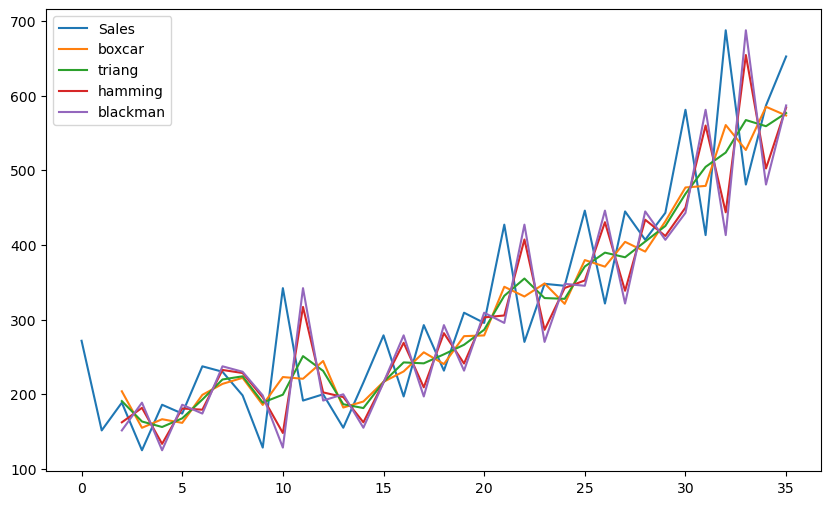

In [10]:
import statsmodels.api as sm  


# Apply a rolling window using the 'boxcar' (rectangular) window type, with a window size of 3
sales_data['boxcar'] = sales_data.Sales.rolling(3, win_type='boxcar').mean()

# Apply a rolling window using the 'triang' (triangular) window type, with a window size of 3
sales_data['triang'] = sales_data.Sales.rolling(3, win_type='triang').mean()

# Apply a rolling window using the 'hamming' window type (a weighted window to reduce noise), with a window size of 3
sales_data['hamming'] = sales_data.Sales.rolling(3, win_type='hamming').mean()

# Apply a rolling window using the 'blackman' window type (another windowing function that reduces noise), with a window size of 3
sales_data['blackman'] = sales_data.Sales.rolling(3, win_type='blackman').mean()

# Plot the rolling means of all the different window types
sales_data.plot(kind='line', figsize=(10, 6)); 

## Defining Cointegration

Consider a drunk man and his dog out on a walk. Correlation tells us whether they are
going in the same direction. Cointegration tells us something about the distance over time
between the man and his dog. We will show cointegration using randomly generated timeseries and real data. The **Augmented Dickey-Fuller (ADF)** test tests for a unit root in a time series and can be used to determine the stationarity of time series.

In [13]:
# 1. Import the required libraries and define the following function to calculate the ADF statistic:

# Import the necessary library for statistical models and time series analysis
import statsmodels.api as sm
import statsmodels.tsa.stattools as ts

# Define a function to calculate the ADF statistic using OLS regression
def calc_adf(x, y):
    result = sm.OLS(x, y).fit()       # Fit an Ordinary Least Squares (OLS) regression of x on y
    return ts.adfuller(result.resid)  # Perform the ADF test on the residuals of the OLS regression and return the result

# 2. Load the Sunspot data into a NumPy array:

# Load the sunspot dataset from statsmodels and convert it to a NumPy array
data = sm.datasets.sunspots.load_pandas().data.values  # Load the Sunspot dataset as a Pandas DataFrame and convert to NumPy array
N = len(data)                                          # Get the length of the dataset (total number of data points)

# 3. Generate a sine wave and calculate the cointegration of the sine with itself:

# Generate a sine wave and apply the ADF test to check for stationarity (cointegration)

t = np.linspace(-2 * np.pi, 2 * np.pi, N)  # Generate a sequence of values from -2π to 2π, with N data points
sine = np.sin(np.sin(t))                   # Apply a nested sine function to the generated values to create a sine wave

# Print the results of applying the ADF test to the sine wave (self-cointegration test)
print("Self ADF", calc_adf(sine, sine))  # Calculate and display the ADF statistic and p-value for the sine wave's residuals

Self ADF (6.979284431377893e-16, 0.958532086060056, 0, 308, {'1%': -3.45176116018037, '5%': -2.870970093607691, '10%': -2.571794416006072}, -21533.11365547772)


#### ADF Output:

`6.979284431377893e-16`:

This is the **test statistic**. It indicates how strongly the time series is stationary. A more negative value would suggest that the time series is likely stationary (i.e., it does not have a unit root).

`0.958532086060056`:

This is the p-value. It helps determine the statistical significance of the test. In the ADF test, if the p-value is below a certain threshold (e.g., 0.05), we reject the null hypothesis (the series has a unit root, meaning it's non-stationary) and conclude that the series is stationary. Here, a p-value of 0.9585 is very high, meaning we fail to reject the null hypothesis, and the series is likely non-stationary.

`0`:

This is the number of lags used in the test. In this case, no lagged differences were used in the ADF test.

`308`:

This is the number of observations used in the test after lagging. It's the number of data points minus any lagged observations that are not used.

`{'1%': -3.45176116018037, '5%': -2.870970093607691, '10%': -2.571794416006072}`:

These are the critical values for different confidence levels (1%, 5%, and 10%). These critical values help you compare the test statistic to determine stationarity:

- If the test statistic is more negative than the critical value at a given significance level, the null hypothesis of the unit root is rejected.

- In this case, the test statistic (6.979e-16) is much higher than all the critical values, indicating non-stationarity.

`-21533.11365547772`:

This is the maximized information criterion (in this case, the Akaike Information Criterion, or AIC). It provides a measure of the goodness-of-fit of the model while penalizing for complexity (number of parameters). Lower values of AIC indicate a better model.


#### Conclusion:

The ADF test results suggest that the sine wave is non-stationary. The p-value (0.9585) is very high, and the test statistic is not smaller (more negative) than any of the critical values, so we fail to reject the null hypothesis of non-stationarity.

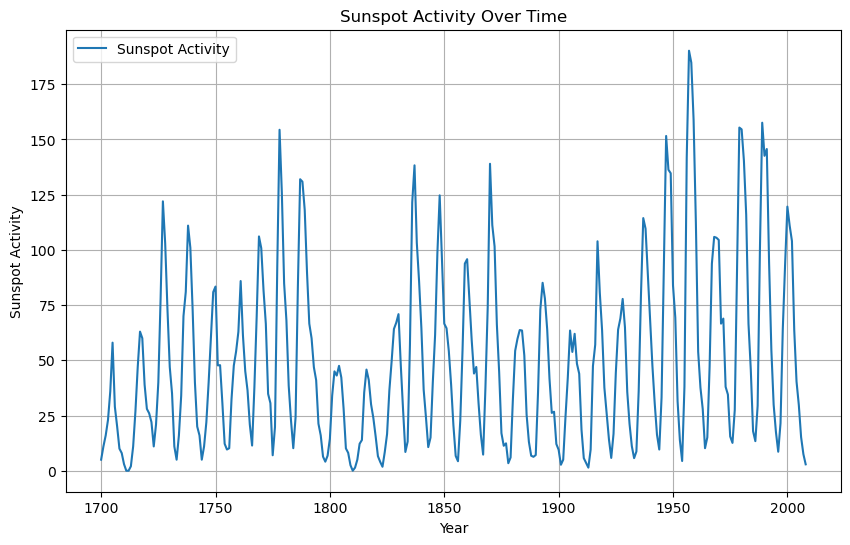

In [15]:
# Load the Sunspot data
data = sm.datasets.sunspots.load_pandas().data

# Create a plot of the sunspot data
plt.figure(figsize=(10, 6))                                            # Set the figure size
plt.plot(data['YEAR'], data['SUNACTIVITY'], label='Sunspot Activity')  # Plot 'YEAR' vs 'SUNACTIVITY'
plt.title('Sunspot Activity Over Time')                                # Add a title to the plot
plt.xlabel('Year')                                                     # Label for the x-axis
plt.ylabel('Sunspot Activity')                                         # Label for the y-axis
plt.grid(True)                                                         # Add a grid to the plot
plt.legend()                                                           # Display the legend
plt.show()                                                             # Show the plot

In [16]:
# 1. Import the required libraries and define the following function to calculate the ADF statistic:

# Import the necessary library for statistical models and time series analysis
import statsmodels.api as sm
import statsmodels.tsa.stattools as ts

# Define a function to calculate the ADF statistic using OLS regression
def calc_adf(x, y):
    result = sm.OLS(x, y).fit()       # Fit an Ordinary Least Squares (OLS) regression of x on y
    return ts.adfuller(result.resid)  # Perform the ADF test on the residuals of the OLS regression and return the result

# 2. Load the Sunspot data into a NumPy array:

# Load the sunspot dataset from statsmodels and convert it to a NumPy array
data = sm.datasets.sunspots.load_pandas().data.values  # Load the Sunspot dataset as a Pandas DataFrame and convert to NumPy array
N = len(data)                                          # Get the length of the dataset (total number of data points)

# 3. Generate a sine wave and calculate the cointegration of the sine with itself:

# Generate a sine wave and apply the ADF test to check for stationarity (cointegration)

t = np.linspace(-2 * np.pi, 2 * np.pi, N)  # Generate a sequence of values from -2π to 2π, with N data points
sine = np.sin(np.sin(t))                   # Apply a nested sine function to the generated values to create a sine wave

# 4. Now, add noise to the sine to demonstrate how noise will influence the signal:

# Apply ADF test on Sine and Sine with noise
noise = np.random.normal(0, .01, N)
print("ADF sine with noise", calc_adf(sine, sine + noise))

ADF sine with noise (-13.828370812165856, 7.673852573298042e-26, 1, 307, {'1%': -3.4518314994261337, '5%': -2.8710009653519166, '10%': -2.571810878948318}, -1833.4722894088513)


| ADF Statistic | p-value | Used Lag | # Observations | Critical Value (1%) | Critical Value (5%) | Critical Value (10%) | AIC | 
|:---------|:--------:|---------:|:--------:|:--------:|:--------:|:--------:|:--------:|
|  -12.025392   |  2.96e-22   |  2   |  306   |  -3.451902   |  -2.871032   |  -2.571827   |  -1898.749952   |

The p-value has gone down considerably. The ADF metric here, -12.03, is lower
than all the critical values in the dictionary. All these are strong arguments to
reject cointegration.

In [19]:
#5. Let's generate a cosine of a larger magnitude and offset. Again, let's add noise to it:

# Apply ADF test on Sine and Cosine with noise
cosine = 100 * np.cos(t) + 10
print("ADF sine vs cosine with noise", calc_adf(sine, cosine + noise))

ADF sine vs cosine with noise (-3.2343393724369593, 0.018081062507493046, 6, 302, {'1%': -3.4521902441030963, '5%': -2.871158406898617, '10%': -2.5718948388228586}, -11904.566366171603)


Similarly, we have strong arguments to reject cointegration. Checking for
cointegration between the sine and sunspots gives the following output:

In [21]:
print("Sine vs sunspots", calc_adf(sine, data))

Sine vs sunspots (-6.7242691810700945, 3.4210811915550405e-09, 16, 292, {'1%': -3.4529449243622383, '5%': -2.871489553425686, '10%': -2.572071437887033}, -1102.5867415291168)


# STL decomposition

STL stands for seasonal and trend decomposition using LOESS. STL is a time-series
decomposition method that can decompose an observed signal into a trend, seasonality,
and residual. It can estimate non-linear relationships and handle any type of seasonality.
The `statsmodels.tsa.seasonal` subpackage offers the `seasonal_decompose` method
for splitting a given input signal into trend, seasonality, and residual.

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Read the dataset
url = "https://raw.githubusercontent.com/PacktPublishing/Python-Data-Analysis-Third-Edition/refs/heads/master/Chapter08/beer_production.csv"
data = pd.read_csv(url)  
data.columns = ['date', 'data']  # Rename columns

data.head()

,date,data
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9


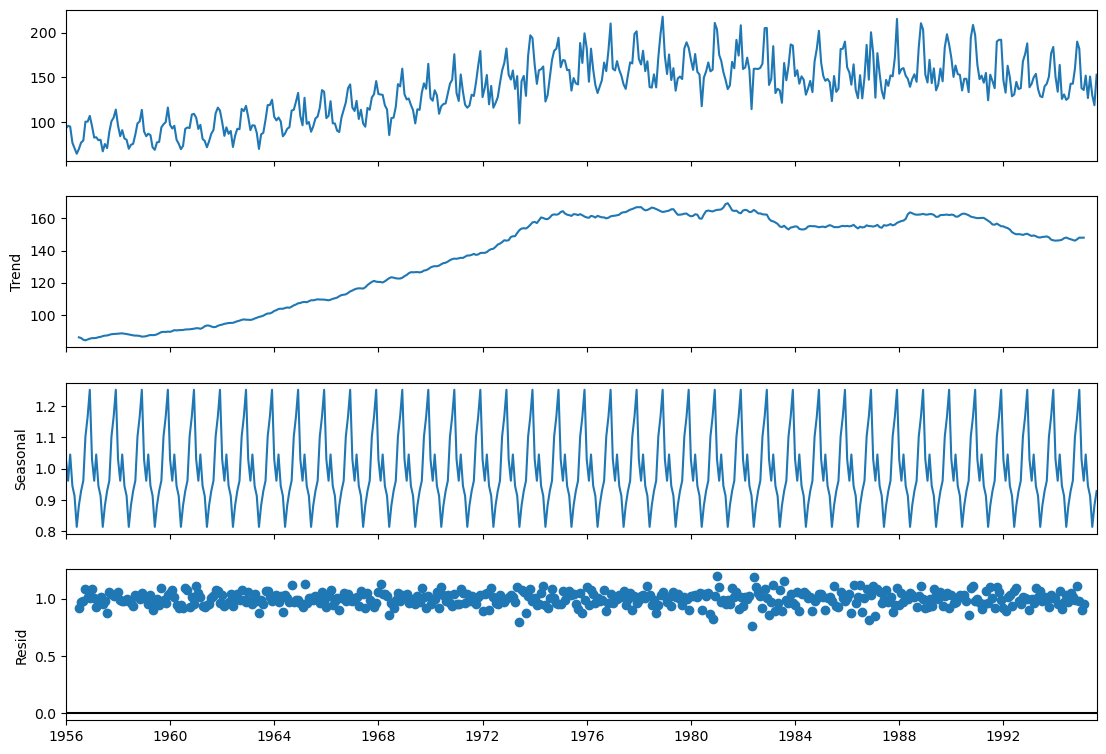

In [25]:
# Change datatype to pandas datetime
data['date'] = pd.to_datetime(data['date'])
data=data.set_index('date')

# Decompose the data
decomposed_data = seasonal_decompose(data, model='multiplicative')

# Plot decomposed data with a larger figure size
fig = decomposed_data.plot()
fig.set_size_inches(12, 8) 

# Display the plot
plt.show()

# Autocorrelation

Autocorrelation, or lagged correlation, is the correlation between a time series and its
lagged series. It indicates the trend in the dataset. The autocorrelation formula can be
defined as follows:

$$
R(\tau) = \frac{\sum_{t=1}^{N - \tau} (x_t - \bar{x})(x_{t+\tau} - \bar{x})}{\sum_{t=1}^N (x_t - \bar{x})^2}
$$


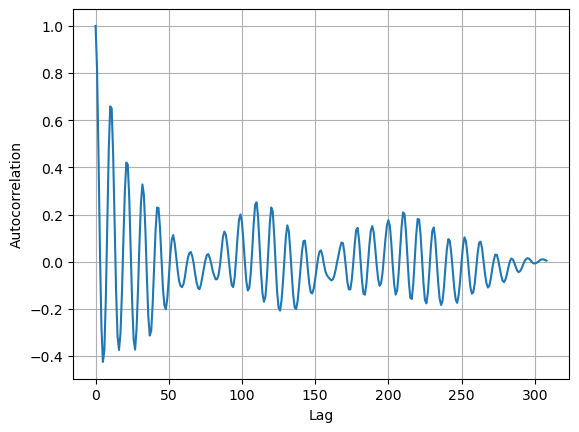

In [29]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the sunspot dataset from statsmodels
data = sm.datasets.sunspots.load_pandas().data

# Calculate autocorrelation using numpy
dy = data.SUNACTIVITY - np.mean(data.SUNACTIVITY)
dy_square = np.sum(dy ** 2)

# Cross-correlation
sun_correlated = np.correlate(dy, dy, mode='full')/dy_square
result = sun_correlated[int(len(sun_correlated)/2):]

# Diplay the Chart
plt.plot(result)

# Display grid
plt.grid(True)

# Add labels
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")

# Display the chart
plt.show()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

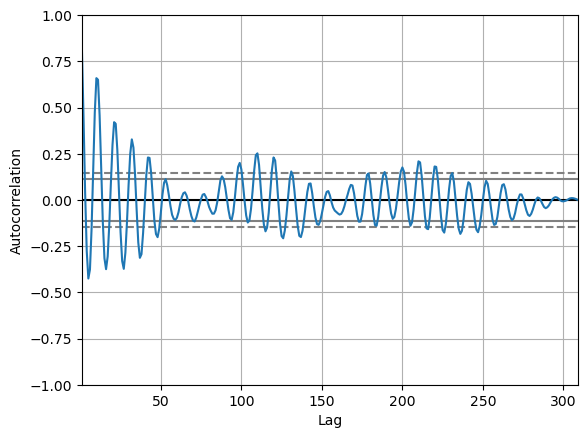

In [30]:
from pandas.plotting import autocorrelation_plot

# Plot using pandas function
autocorrelation_plot(data.SUNACTIVITY)

# Autoregressive Models
Autoregressive models are time-series models used to predict future incidents. The following formula shows this:

## Autoregressive (AR) Models

The Autoregressive (AR) model of order \(p\), denoted as AR(\(p\)), is defined as:

$$
X_t = c + \phi_1 X_{t-1} + \phi_2 X_{t-2} + \cdots + \phi_p X_{t-p} + \epsilon_t
$$

where:

- \(X_t\): The value of the time series at time \(t\).
- \(c\): Constant term (also called intercept).
- \(\phi_1, \phi_2, \ldots, \phi_p\): Coefficients of the model.
- \(p\): Order of the model (number of lagged observations).
- \(\epsilon_t\): White noise error term at time \(t\), assumed to have zero mean and constant variance.


In [33]:
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
import statsmodels.api as sm

# Read the dataset
data = sm.datasets.sunspots.load_pandas().data

# Split data into train and test set
train_ratio = 0.8
train = data[:int(train_ratio * len(data))]
test = data[int(train_ratio * len(data)):]

# Automatically select the optimal number of lags based on the BIC criterion
selected_order = ar_select_order(train.SUNACTIVITY, maxlag=20, ic='bic', seasonal=False)

# Fit the AutoReg model with the selected number of lags
ar_model = AutoReg(train.SUNACTIVITY, lags=selected_order.ar_lags)
ar_model_fitted = ar_model.fit()

# Print number of lags and coefficients
print("Selected Lags:", selected_order.ar_lags)  # Display the lag values used for model selection
print("Model Coefficients:\n", ar_model_fitted.params)  # Display the model parameters

Selected Lags: [1, 2]
Model Coefficients:
 const             14.011055
SUNACTIVITY.L1     1.371219
SUNACTIVITY.L2    -0.686129
dtype: float64


In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Make predictions on the test set
test_pred = ar_model_fitted.predict(start=test.index[0], end=test.index[-1])

# Calculate errors
mae = mean_absolute_error(test['SUNACTIVITY'], test_pred)
rmse = np.sqrt(mean_squared_error(test['SUNACTIVITY'], test_pred))

print("Test MAE:", mae)
print("Test RMSE:", rmse)

Test MAE: 43.08808289461915
Test RMSE: 55.42554889574299


In [35]:
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
import statsmodels.api as sm

# Read the dataset
data = sm.datasets.sunspots.load_pandas().data

# Split data into train and test set
train_ratio = 0.8
train = data[:int(train_ratio * len(data))]
test = data[int(train_ratio * len(data)):]

# Automatically select the optimal number of lags based on the BIC criterion
selected_order = ar_select_order(train.SUNACTIVITY, maxlag=20, ic='aic', seasonal=False)

# Fit the AutoReg model with the selected number of lags
ar_model = AutoReg(train.SUNACTIVITY, lags=selected_order.ar_lags)
ar_model_fitted = ar_model.fit()

# Print number of lags and coefficients
print("Selected Lags:", selected_order.ar_lags)  # Display the lag values used for model selection
print("Model Coefficients:\n", ar_model_fitted.params)  # Display the model parameters

Selected Lags: [1, 2, 3, 4, 5, 6, 7, 8, 9]
Model Coefficients:
 const             8.215058
SUNACTIVITY.L1    1.230978
SUNACTIVITY.L2   -0.503672
SUNACTIVITY.L3   -0.111330
SUNACTIVITY.L4    0.163143
SUNACTIVITY.L5   -0.149200
SUNACTIVITY.L6    0.044328
SUNACTIVITY.L7   -0.041596
SUNACTIVITY.L8    0.070587
SUNACTIVITY.L9    0.120862
dtype: float64


In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Make predictions on the test set
test_pred = ar_model_fitted.predict(start=test.index[0], end=test.index[-1])

# Calculate errors
mae = mean_absolute_error(test['SUNACTIVITY'], test_pred)
rmse = np.sqrt(mean_squared_error(test['SUNACTIVITY'], test_pred))

print("Test MAE:", mae)
print("Test RMSE:", rmse)

Test MAE: 32.30458475890621
Test RMSE: 43.0584854456254


In [37]:
from statsmodels.tsa.ar_model import AutoReg  # Import AutoReg from statsmodels
import statsmodels.api as sm

# Read the dataset
data = sm.datasets.sunspots.load_pandas().data

# Split data into train and test set
train_ratio = 0.8
train = data[:int(train_ratio * len(data))]
test = data[int(train_ratio * len(data)):]

# AutoRegression Model training with 15 lags
ar_model = AutoReg(train.SUNACTIVITY, lags=15)  # Use AutoReg with 15 lags
ar_model_fitted = ar_model.fit()

# Print number of lags and coefficients
print("Number of Lags:", ar_model_fitted.ar_lags)  # Use ar_lags to access the number of lags
print("Model Coefficients:\n", ar_model_fitted.params)  # Display the model parameters

Number of Lags: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Model Coefficients:
 const              9.382322
SUNACTIVITY.L1     1.225684
SUNACTIVITY.L2    -0.512193
SUNACTIVITY.L3    -0.130695
SUNACTIVITY.L4     0.193492
SUNACTIVITY.L5    -0.168907
SUNACTIVITY.L6     0.054594
SUNACTIVITY.L7    -0.056725
SUNACTIVITY.L8     0.109404
SUNACTIVITY.L9     0.108993
SUNACTIVITY.L10   -0.117063
SUNACTIVITY.L11    0.200454
SUNACTIVITY.L12   -0.075111
SUNACTIVITY.L13   -0.114437
SUNACTIVITY.L14    0.177516
SUNACTIVITY.L15   -0.091978
dtype: float64


In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Make predictions on the test set
test_pred = ar_model_fitted.predict(start=test.index[0], end=test.index[-1])

# Calculate errors
mae = mean_absolute_error(test['SUNACTIVITY'], test_pred)
rmse = np.sqrt(mean_squared_error(test['SUNACTIVITY'], test_pred))

print("Test MAE:", mae)
print("Test RMSE:", rmse)

Test MAE: 31.178460983500187
Test RMSE: 42.153841848834716


#### Result

BIC Model:

    Test MAE: 43.09
    Test RMSE: 55.43

AIC Model:

    Test MAE: 32.30
    Test RMSE: 43.06

Model with Fixed Lags (15 lags):

    Test MAE: 31.18
    Test RMSE: 42.15

#### Interpretation

Lower values of MAE and RMSE indicate better model performance.

- MAE measures the average absolute error between predictions and actual values. A lower MAE indicates that predictions are closer to the actual values.

- RMSE penalizes larger errors more than MAE because it squares the residuals before averaging, so it can be more sensitive to outliers.

#### Comparing Models:

The BIC model has the highest MAE and RMSE, indicating that it is the least accurate among the three models.
The AIC model improves upon the BIC model significantly, reducing both the MAE and RMSE.
The fixed-lag model (15 lags) performs the best, with the lowest MAE and RMSE values. This indicates that including more lagged terms captures more of the pattern in the data.

#### Conclusion:

The model with 15 fixed lags is the best among the three, as it has the lowest MAE and RMSE, suggesting that it fits the test data more accurately.

However, it is also important to consider:

- Overfitting Risk: Adding more lags may lead to a better fit to the training data, but can overfit the noise. If performance on a validation set is similar, then the additional lags are justified.

- Model Complexity vs. Performance Trade-off: If interpretability and simplicity are important, a model with fewer lags (e.g., AIC-based) might be preferred even though it slightly underperforms.

In this case, the model with 15 lags provides the best predictive performance.

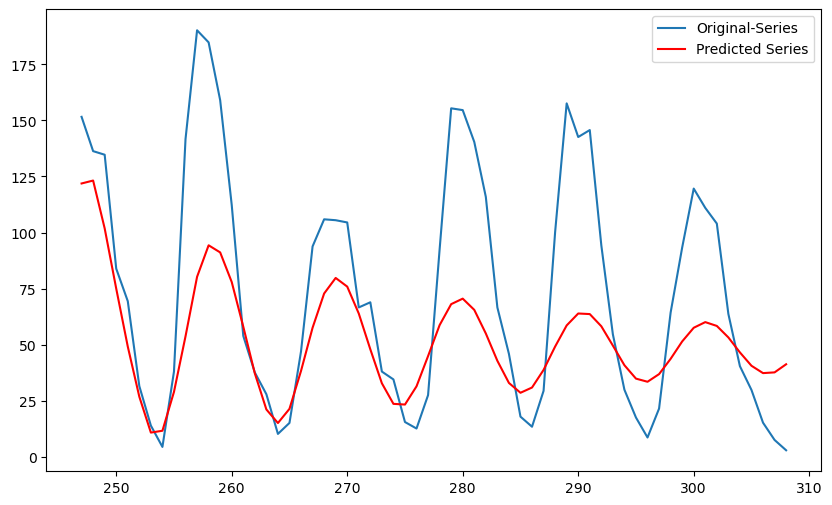

In [40]:
# Setting figure size
plt.figure(figsize=(10,6))

# Plot test data
plt.plot(test.SUNACTIVITY, label='Original-Series')

# Plot predictions
plt.plot(test_pred, color='red', label='Predicted Series')

# Add legends
plt.legend()

# Display the plot
plt.show()

# ARMA models

The ARMA model blends autoregression and moving averages. The ARMA model is
commonly referred to as ARMA(p,q), where p is the order of the autoregressive part, and q
is the order of the moving average:

$$
\text{ARMA}(p, q): \quad y_t = c + \phi_1 y_{t-1} + \phi_2 y_{t-2} + \cdots + \phi_p y_{t-p} + \epsilon_t + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \cdots + \theta_q \epsilon_{t-q}
$$

In the preceding formula, just like in the autoregressive model formula, we have a constant
and a white noise component; however, we try to fit the lagged noise components as well:

In [45]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA  # Correct import for ARIMA
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

# Read the dataset
data = sm.datasets.sunspots.load_pandas().data
data.drop('YEAR', axis=1, inplace=True)

# Split data into train and test set
train_ratio = 0.8
train = data[:int(train_ratio * len(data))]
test = data[int(train_ratio * len(data)):]

# ARIMA Model training (ARMA is a specific case of ARIMA with no integration)
arma_model = ARIMA(train, order=(8, 0, 1))  # Use ARIMA with order (p, d, q) where d=0 for ARMA
arma_model_fitted = arma_model.fit()

# Make predictions
start_point = len(train)
end_point = start_point + len(test) - 1
pred = arma_model_fitted.predict(start=start_point, end=end_point)

# Calculate errors
mae = mean_absolute_error(test.SUNACTIVITY, pred)
mse = mean_squared_error(test.SUNACTIVITY, pred)
rmse = sqrt(mse)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

MAE: 33.28356458480101
MSE: 2000.2386529382095
RMSE: 44.72402769136753


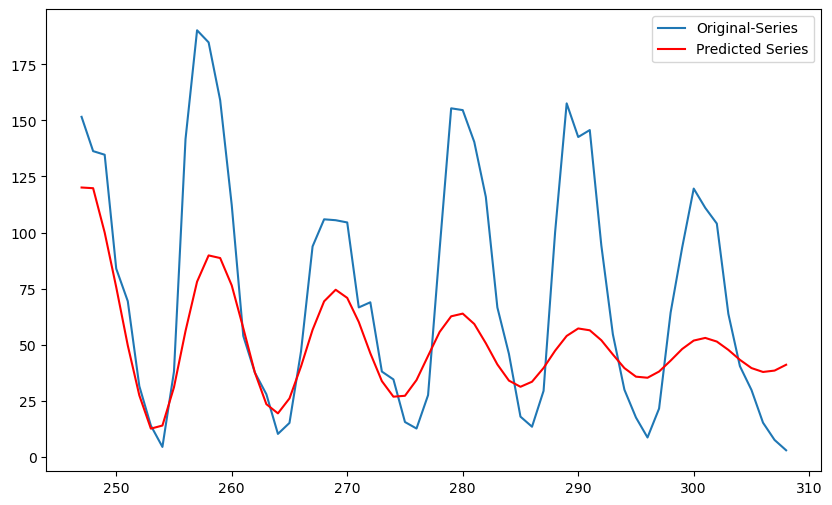

In [46]:
# Setting figure size
plt.figure(figsize=(10,6))

# Plot test data
plt.plot(test, label='Original-Series')

# Plot predictions
plt.plot(pred, color='red', label='Predicted Series')

# Add legends
plt.legend()

# Display the plot
plt.show()

In the preceding code, we have read the Sunspot dataset and split it into two parts: train
and test sets. Then, we built the ARMA model by creating an instance and fitting a model.
We made the predictions on the test dataset and assessed the model performance using
MAE, MSE, and RMSE. Finally, we saw the line plot for the original series and prediction
series.

# Generating Periodic Signals

In [49]:
# Import required libraries
import numpy as np
import statsmodels.api as sm
from scipy.optimize import leastsq
import matplotlib.pyplot as plt

# Create model function
def model(p, t):
    C, p1, f1, phi1 , p2, f2, phi2, p3, f3, phi3 = p
    return C + p1 * np.sin(f1 * t + phi1) + p2 * np.sin(f2 * t + phi2) +p3 * np.sin(f3 * t + phi3)
    
# Create error function
def error(p, y, t):
    return y - model(p, t)
    
# Create fit function
def fit(y, t):
    p0 = [y.mean(), 0, 2 * np.pi/11, 0, 0, 2 * np.pi/22, 0, 0, 2 * np.pi/100, 0]
    params = leastsq(error, p0, args=(y, t))[0]
    return params

# Load the dataset
data_loader = sm.datasets.sunspots.load_pandas()
sunspots = data_loader.data["SUNACTIVITY"].values
years = data_loader.data["YEAR"].values

# Apply and fit the model
cutoff = int(.9 * len(sunspots))
params = fit(sunspots[:cutoff], years[:cutoff])
print("Params:\n", params)
pred = model(params, years[cutoff:])
actual = sunspots[cutoff:]
mid = (actual + pred)/2

print("\nRoot mean square error:", np.sqrt(np.mean((actual - pred) **2)))
print("Mean absolute error:", np.mean(np.abs(actual - pred)))
print("Mean absolute percentage error:", 100 * np.mean(np.abs(actual - pred)/actual))
print("Symmetric Mean absolute percentage error:", 100 * np.mean(np.abs(actual - pred)/mid))
print("Coefficient of determination:", 1 - ((actual - pred)**2).sum()/ ((actual - actual.mean()) ** 2).sum())
print()

Params:
 [ 47.18800335  28.89947427   0.56827284   6.51168781   4.55215008
   0.29372074 -14.30920341 -18.16523992   0.06574835  -4.37789699]

Root mean square error: 59.561930255687216
Mean absolute error: 44.581468315714496
Mean absolute percentage error: 65.16404904506578
Symmetric Mean absolute percentage error: 78.44776724314043
Coefficient of determination: -0.36352579271706853



The first line displays the coefficients of the model we attempted. We have an
MAE of 44, which means that we are off by that amount in either direction on
average. We also want the coefficient of determination to be as close to 1 as
possible to have a good fit. Instead, we get a negative value, which is undesirable.
Let's create a graph to understand the results in detail.

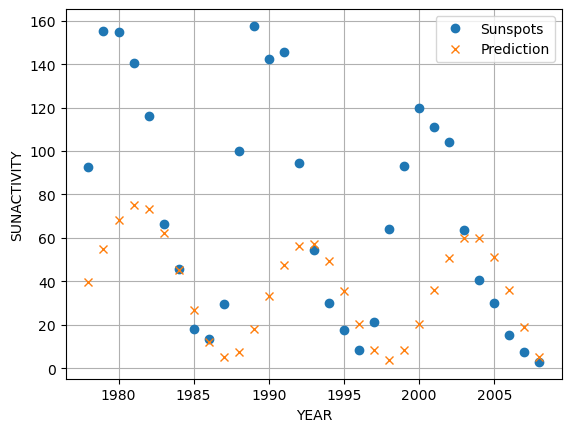

In [51]:
year_range = data_loader.data["YEAR"].values[cutoff:]

# Plot the actual and predicted data points
plt.plot(year_range, actual, 'o', label="Sunspots")
plt.plot(year_range, pred, 'x', label="Prediction")
plt.grid(True)

# Add labels
plt.xlabel("YEAR")
plt.ylabel("SUNACTIVITY")

# Add legend
plt.legend()

# Display the chart
plt.show()

From the preceding graph, we can conclude that the model is not able to capture the actual
pattern of the series. This is why we get a negative coefficient of determination or R-squared. 

# Fourier Analysis

Fourier analysis uses the Fourier series concept thought up by the mathematician Joseph
Fourier. The Fourier series is a mathematical method used to represent functions as an
infinite series of sine and cosine terms. The functions in question can be real- or complexvalued:

$$
X(\omega) = \sum_{t=-\infty}^{\infty} x[t] e^{-i \omega t}
$$


Index of max sine FFT: [160 157 166 158 154]
Indices of max sunspots FFT: [205 212 215 209 154]


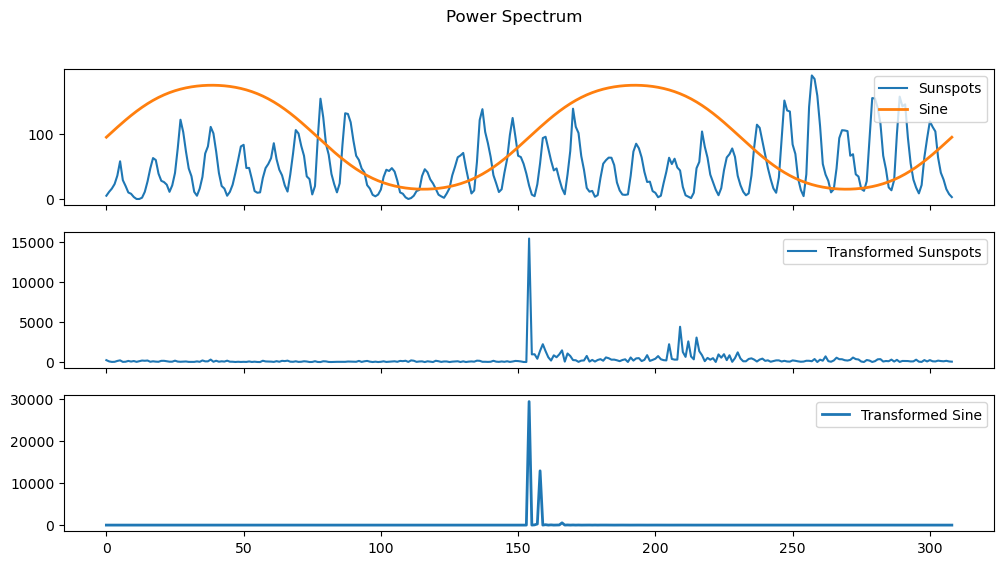

In [56]:
import statsmodels.api as sm  
import matplotlib.pyplot as plt 
from scipy.fftpack import rfft  
from scipy.fftpack import fftshift 

# Read the dataset
data = sm.datasets.sunspots.load_pandas().data  # Load the sunspots dataset from statsmodels

# Create Sine wave
t = np.linspace(-2 * np.pi, 2 * np.pi,        # Generate an array of evenly spaced values over the specified range
                len(data.SUNACTIVITY.values)) # Length of sine wave is same as the sunspots dataset length
mid = np.ptp(data.SUNACTIVITY.values)/2       # Calculate the peak-to-peak amplitude and divide by 2 (half range)
sine = mid + mid * np.sin(np.sin(t))          # Create a sine wave oscillating within the half range

# Compute FFT for Sine wave
sine_fft = np.abs(fftshift(rfft(sine)))          # Apply FFT to the sine wave and center the frequencies
print("Index of max sine FFT:", np.argsort(sine_fft)[-5:])  # Print indices of top 5 FFT magnitudes for sine

# Compute FFT for sunspots dataset
transformed = np.abs(fftshift(rfft(data.SUNACTIVITY.values)))        # Apply FFT to sunspots data and center frequencies
print("Indices of max sunspots FFT:", np.argsort(transformed)[-5:])  # Print indices of top 5 FFT magnitudes for sunspots

# Create subplots
fig, axs = plt.subplots(3, figsize=(12, 6), sharex=True) # Create 3 vertically aligned subplots with shared x-axis
fig.suptitle('Power Spectrum')                           # Set the main title for the figure

axs[0].plot(data.SUNACTIVITY.values, label="Sunspots") # Plot original sunspots data in the first subplot
axs[0].plot(sine, lw=2, label="Sine")                  # Overlay the sine wave on the first subplot
axs[0].legend()                                        # Set legends for the first subplot

axs[1].plot(transformed, label="Transformed Sunspots") # Plot the FFT-transformed sunspots data in the second subplot
axs[1].legend()                                        # Set legends for the second subplot

axs[2].plot(sine_fft, lw=2, label="Transformed Sine")  # Plot the FFT-transformed sine wave in the third subplot
axs[2].legend()                                        # Set legends for the third subplot

# Display the chart
plt.show()  

In the preceding code, first, we read the Sunspot dataset and created the sine wave. Afterthat, we computed the FFT for the sine wave and the SUNACTIVITY column. Finally, weplotted the three graphs for the original series and sine wave and transformed sunspots andsine wave.

# Spectral Analysis Filtering

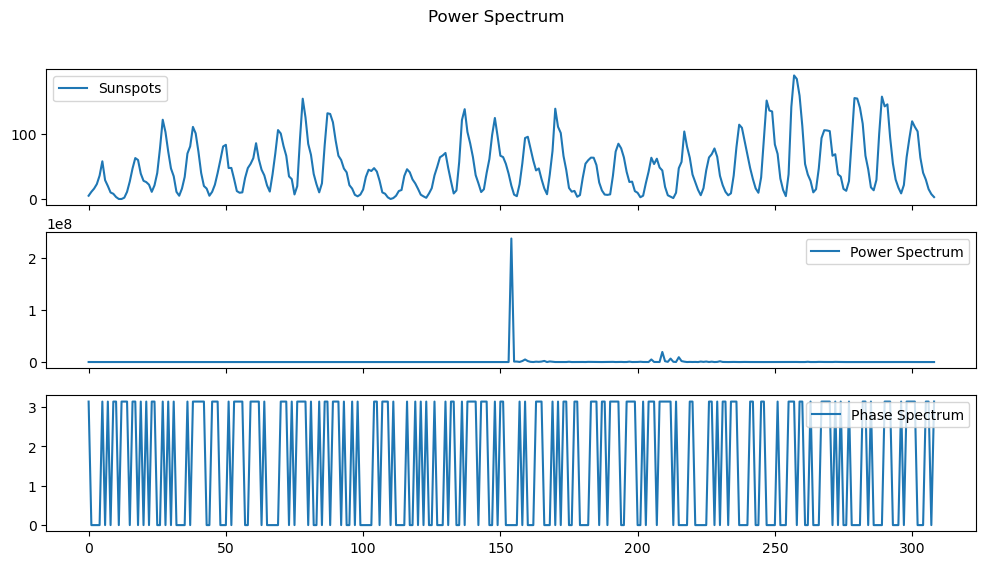

In [59]:
# Import required library
import numpy as np  
import statsmodels.api as sm  
from scipy.fftpack import rfft  
from scipy.fftpack import fftshift 
import matplotlib.pyplot as plt  

# Read the dataset
data = sm.datasets.sunspots.load_pandas().data           # Load the sunspots dataset from statsmodels

# Compute FFT
transformed = fftshift(rfft(data.SUNACTIVITY.values))    # Apply FFT to the sunspot activity and center frequencies

# Compute Power Spectrum
power = transformed ** 2                                 # Calculate the power spectrum by squaring the magnitude of the transformed data

# Compute Phase
phase = np.angle(transformed)                            # Calculate the phase spectrum by finding the angle of the complex values

# Create subplots
fig, axs = plt.subplots(3, figsize=(12, 6), sharex=True) # Create 3 vertically aligned subplots with shared x-axis
fig.suptitle('Power Spectrum')                           # Set the main title for the figure

axs[0].plot(data.SUNACTIVITY.values, label="Sunspots")   # Plot the original sunspot activity data in the first subplot
axs[0].legend()                                          # Set legends for the first subplot

axs[1].plot(power, label="Power Spectrum")               # Plot the power spectrum in the second subplot
axs[1].legend()                                          # Set legends for the second subplot

axs[2].plot(phase, label="Phase Spectrum")               # Plot the phase spectrum in the third subplot
axs[2].legend()                                          # Set legends for the third subplot

# Display the chart
plt.show()  

In the preceding code, first, we read the Sunspot dataset and computed the FFT for the
SUNACTIVITY column. After this, we computed the power and phase spectrum for the
transformed FFT. Finally, we plotted the three graphs for the original series and the power
and phase spectrums using subplots.